<a href="https://colab.research.google.com/github/Arra1807/Student_score_analysis/blob/main/exam_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ara1807","key":"1a56136f4c0905add7b73e7261cb7fd2"}'}

In [3]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d grandmaster07/student-exam-score-dataset-analysis
!unzip student-exam-score-dataset-analysis.zip

Dataset URL: https://www.kaggle.com/datasets/grandmaster07/student-exam-score-dataset-analysis
License(s): ODC Public Domain Dedication and Licence (PDDL)
  0% 0.00/2.37k [00:00<?, ?B/s]
100% 2.37k/2.37k [00:00<00:00, 10.3MB/s]
Archive:  student-exam-score-dataset-analysis.zip
  inflating: student_exam_scores.csv  


In [68]:
!git clone https://github.com/Arra1807/Student_score_analysis.git

Cloning into 'Student_score_analysis'...


# Dataset [Kaggle](https://www.kaggle.com/datasets/grandmaster07/student-exam-score-dataset-analysis/data)

In [67]:
import pandas as pd
import numpy as np
df = pd.read_csv("student_exam_scores.csv")
print('\n')
print("Checking for NaN:")
print(df.isna())
print('\n')
#print("Checking for any zeros:")
print(df.isnull().sum())
print('\n')

print("Checking for any duplicates:")
print(df.duplicated())
print('\n')

print("total duplicates", df.duplicated().sum())



Checking for NaN:
     student_id  hours_studied  sleep_hours  attendance_percent  \
0         False          False        False               False   
1         False          False        False               False   
2         False          False        False               False   
3         False          False        False               False   
4         False          False        False               False   
..          ...            ...          ...                 ...   
195       False          False        False               False   
196       False          False        False               False   
197       False          False        False               False   
198       False          False        False               False   
199       False          False        False               False   

     previous_scores  exam_score  
0              False       False  
1              False       False  
2              False       False  
3              False       False  


In [27]:
df

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3
...,...,...,...,...,...,...
195,S196,10.5,5.4,94.0,87,42.7
196,S197,7.1,6.1,85.1,92,40.4
197,S198,1.6,6.9,63.8,76,28.2
198,S199,12.0,7.3,50.5,58,42.0


In [20]:
df.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


# Regression

In [33]:
from re import L
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, confusion_matrix

X = df[["hours_studied","sleep_hours", "attendance_percent"]]
y = df["previous_scores"]

X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

#Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R2 score: {r2}")



MSE: 273.3017601106474
R2 score: -0.133799911784245


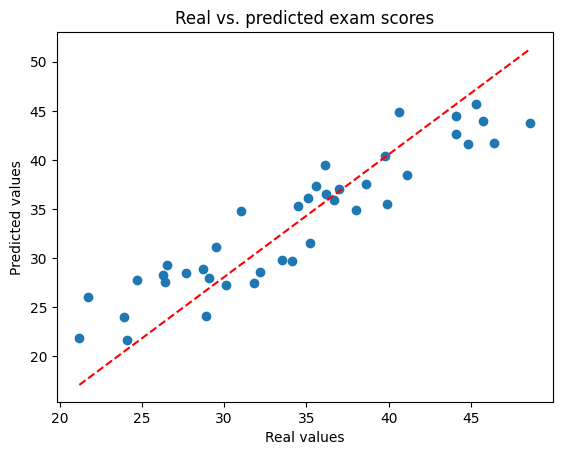

In [20]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y.min(), y.max()], "r--")
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.title("Real vs. predicted exam scores")
plt.show()

# Classification


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

X = df[["attendance_percent", "sleep_hours", "hours_studied"]]
y = df["previous_scores"]

y_class = []
for scores in y:
  if scores < 50:
    y_class.append("F")
  elif scores < 60:
    y_class.append("E")
  elif scores < 70:
    y_class.append("D")
  elif scores < 80:
    y_class.append("C")
  elif scores < 90:
    y_class.append("B")
  elif scores < 100:
    y_class.append("A")

print("y classes:", pd.Series(y_class).value_counts())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train,  y_test = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)


classifier = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
classifier.fit(X_train, y_train)
importance = pd.Series(classifier.feature_importances_, index=X.columns)

print('\n')
#To see how important each class is
print(f"Importance of each class:")
print(importance)

y_pred = classifier.predict(X_test)

print('\n')
print("y_test classes:", pd.Series(y_test).value_counts())
print('\n')
print("y_pred classes:", pd.Series(y_pred).value_counts())

print('\n')
#Accuracy
classification_report_score = classification_report(y_test, y_pred)
print(classification_report_score)


y classes: E    50
C    40
B    36
F    34
D    24
A    16
Name: count, dtype: int64


Importance of each class:
attendance_percent    0.348542
sleep_hours           0.314683
hours_studied         0.336775
dtype: float64


y_test classes: E    13
F     9
C     7
B     5
D     4
A     2
Name: count, dtype: int64


y_pred classes: B    10
E    10
C     8
F     5
D     5
A     2
Name: count, dtype: int64


              precision    recall  f1-score   support

           A       0.00      0.00      0.00         2
           B       0.30      0.60      0.40         5
           C       0.00      0.00      0.00         7
           D       0.00      0.00      0.00         4
           E       0.40      0.31      0.35        13
           F       0.00      0.00      0.00         9

    accuracy                           0.17        40
   macro avg       0.12      0.15      0.12        40
weighted avg       0.17      0.17      0.16        40



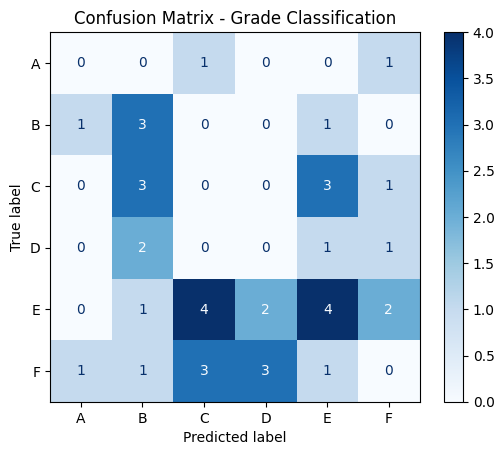

In [51]:
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Grade Classification")
plt.show()